In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import re
import os
import zlib
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import sys
import seaborn as sns
from sklearn.cluster import KMeans
import nltk
nltk.downloader.download('vader_lexicon')
from langdetect import detect

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/thomasdorveaux/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


ModuleNotFoundError: No module named 'langdetect'

In [2]:
#pip install xgboost

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
#from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score 
from sklearn.model_selection import GridSearchCV

In [4]:
Spotify = pd.read_csv('SpotifyFeatures.csv')

## Addition of classes

1. Popularity

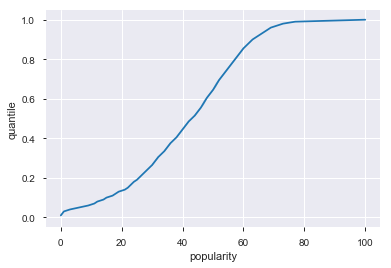

In [5]:
quantile=Spotify['popularity'].quantile(np.arange(0, 1.01, 0.01).tolist())
quantile=quantile.reset_index()
quantile.rename(columns={'index':'quantile'}, inplace=True)
sns.lineplot(quantile['popularity'],quantile['quantile'])

In [6]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(quantile)
quantile['cluster']=kmeans.predict(quantile)

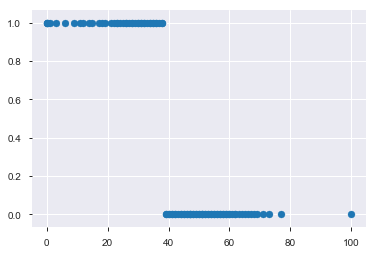

In [7]:
plt.scatter(quantile['popularity'],quantile['cluster'])

In [8]:
'''one=quantile[quantile.cluster==1]
two=quantile[quantile.cluster==2]
three=quantile[quantile.cluster==3]
zero=quantile[quantile.cluster==0]
four=quantile[quantile.cluster==4]
min_one=np.min(one['popularity'])
max_one=np.max(one['popularity'])
min_two=np.min(two['popularity'])
max_two=np.max(two['popularity'])
min_three=np.min(three['popularity'])
max_three=np.max(three['popularity'])
min_zero=np.min(zero['popularity'])
max_zero=np.max(zero['popularity'])
min_four=np.min(four['popularity'])
max_four=np.max(four['popularity'])
print(1,min_one,max_one)
print(2,min_two,max_two)
print(3,min_three,max_three)
print(4,min_four,max_four)
print(0,min_zero,max_zero)

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-8-ce7073b9209c>, line 20)

In [9]:
'''conditions = [
    (Spotify['popularity'] >= 78)&(Spotify['popularity'] <=100),
    (Spotify['popularity'] >= 55)&(Spotify['popularity'] <=77),
    (Spotify['popularity'] >= 39)&(Spotify['popularity'] <=54),
    (Spotify['popularity'] >= 19)&(Spotify['popularity'] <=38),
    (Spotify['popularity'] >= 18)&(Spotify['popularity'] <=0)]
choices = [4, 3, 2,1,0]
Spotify['label'] = np.select(conditions, choices)
Spotify

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-9-8e159601b716>, line 9)

In [10]:
conditions = [
    (Spotify['popularity'] >= 80)&(Spotify['popularity'] <=100),
    (Spotify['popularity'] >= 79)&(Spotify['popularity'] <=0)]
choices = [1,0]
Spotify['label'] = np.select(conditions, choices)
Spotify

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.9100,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.8140,0
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.7370,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.8160,0
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.1310,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.3680,0
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.3260,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.2270,0
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.2250,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.3900,0
5,Movie,Henri Salvador,Le petit souper aux chandelles,0Mf1jKa8eNAf1a4PwTbizj,0,0.74900,0.578,160627,0.0948,0.000000,C#,0.1070,-14.970,Major,0.1430,87.479,4/4,0.3580,0
6,Movie,Martin & les fées,"Premières recherches (par Paul Ventimila, Lori...",0NUiKYRd6jt1LKMYGkUdnZ,2,0.34400,0.703,212293,0.2700,0.000000,C#,0.1050,-12.675,Major,0.9530,82.873,4/4,0.5330,0
7,Movie,Laura Mayne,Let Me Let Go,0PbIF9YVD505GutwotpB5C,15,0.93900,0.416,240067,0.2690,0.000000,F#,0.1130,-8.949,Major,0.0286,96.827,4/4,0.2740,0
8,Movie,Chorus,Helka,0ST6uPfvaPpJLtQwhE6KfC,0,0.00104,0.734,226200,0.4810,0.000860,C,0.0765,-7.725,Major,0.0460,125.080,4/4,0.7650,0
9,Movie,Le Club des Juniors,Les bisous des bisounours,0VSqZ3KStsjcfERGdcWpFO,10,0.31900,0.598,152694,0.7050,0.001250,G,0.3490,-7.790,Major,0.0281,137.496,4/4,0.7180,0


2. Acousticness

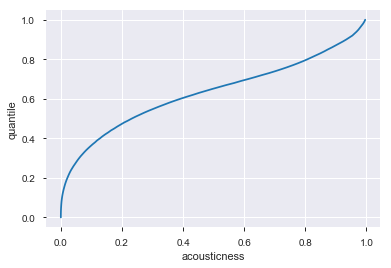

In [11]:
quantile_acou=Spotify['acousticness'].quantile(np.arange(0, 1.01, 0.01).tolist())
quantile_acou=quantile_acou.reset_index()
quantile_acou.rename(columns={'index':'quantile'}, inplace=True)
sns.lineplot(quantile_acou['acousticness'],quantile_acou['quantile'])

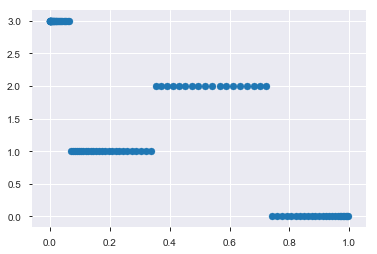

In [12]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(quantile_acou)
quantile_acou['cluster']=kmeans.predict(quantile_acou)
plt.scatter(quantile_acou['acousticness'],quantile_acou['cluster'])

In [13]:
zero=quantile_acou[quantile_acou.cluster==0]
one=quantile_acou[quantile_acou.cluster==1]
two=quantile_acou[quantile_acou.cluster==2]
three=quantile_acou[quantile_acou.cluster==3]
four=quantile_acou[quantile_acou.cluster==4]

min_zero=np.min(zero['acousticness'])
max_zero=np.max(zero['acousticness'])
min_one=np.min(one['acousticness'])
max_one=np.max(one['acousticness'])
min_two=np.min(two['acousticness'])
max_two=np.max(two['acousticness'])
min_three=np.min(three['acousticness'])
max_three=np.max(three['acousticness'])

print(0,min_zero,max_zero)
print(1,min_one,max_one)
print(2,min_two,max_two)
print(3,min_three,max_three)

0 0.7410000000000001 0.996
1 0.0709 0.337
2 0.354 0.722
3 0.0 0.0651


In [14]:
conditions_acou = [
    (Spotify['acousticness'] >= 0.6158599999999996)&(Spotify['acousticness'] <=0.995),
    (Spotify['acousticness'] >= 0.251)& (Spotify['acousticness'] <=0.594),
    (Spotify['acousticness'] >= 0.0363)&(Spotify['acousticness'] <=0.239),
    (Spotify['acousticness'] >= 1.39e-06)&(Spotify['acousticness'] <=0.03276299999999999)]
choices_acou = [3, 2,1,0]
Spotify['label_acou'] = np.select(conditions_acou, choices_acou)

# Features Engineering

1. Analysing features distributions

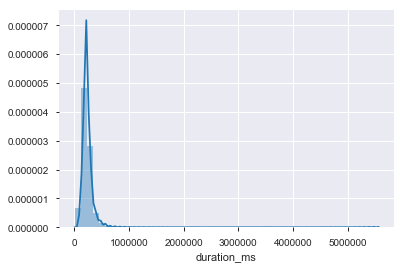

In [15]:
sns.distplot(Spotify['duration_ms'])

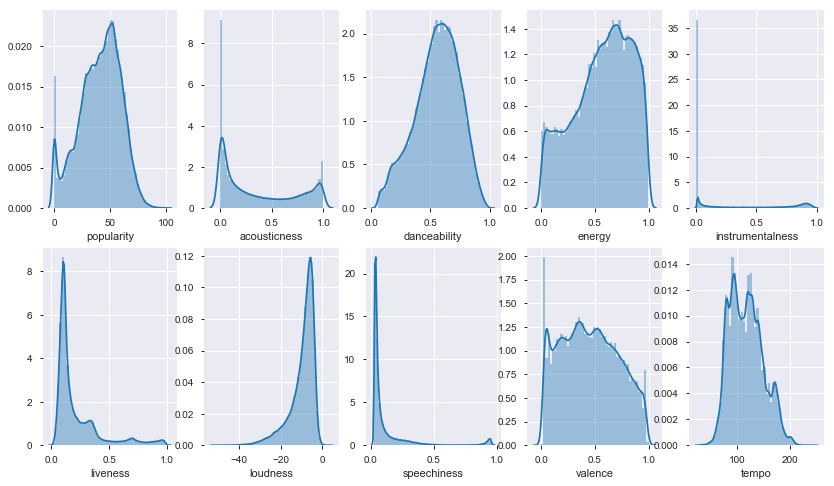

In [16]:
f, axes = plt.subplots(2, 5, figsize=(14, 8), sharex=False)
sns.distplot(Spotify['popularity'],ax=axes[0,0])
sns.distplot(Spotify['acousticness'],ax=axes[0,1])
sns.distplot(Spotify['danceability'],ax=axes[0,2])
sns.distplot(Spotify['energy'],ax=axes[0,3])
sns.distplot(Spotify['instrumentalness'],ax=axes[0, 4])
sns.distplot(Spotify['liveness'],ax=axes[1,0])
sns.distplot(Spotify['loudness'],ax=axes[1,1])
sns.distplot(Spotify['speechiness'],ax=axes[1,2])
sns.distplot(Spotify['valence'],ax=axes[1,3])
sns.distplot(Spotify['tempo'],ax=axes[1,4])

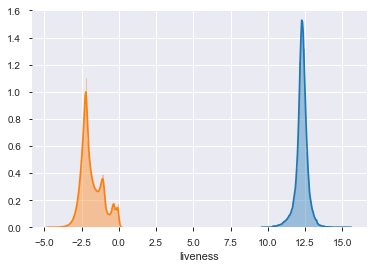

In [17]:
#turning duration_ms to improve this feature
ln_duration_ms = np.log(Spotify['duration_ms'])
ln_liveness = np.log(Spotify['liveness'])
sns.distplot(ln_duration_ms)
sns.distplot(ln_liveness)

(array([10132.,  4385.,  7494.,  8439., 12266., 17623., 19837., 20747.,
        22325., 24460., 26585., 21978., 16939., 10514.,  5408.,  2354.,
          822.,   287.,    92.,    38.]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.]),
 <a list of 20 Patch objects>)

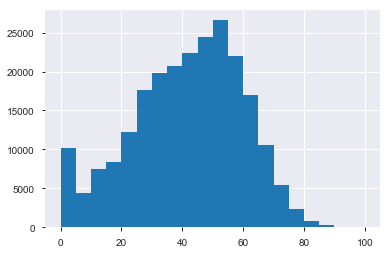

In [18]:
plt.hist(Spotify['popularity'], bins=20)

In [19]:
#plt.scatter(song_lyrics['popularity'],song_lyrics['senti_positive'] )
#plt.scatter(song_lyrics['popularity'],song_lyrics['senti_neutral'] )
#plt.scatter(song_lyrics['popularity'],song_lyrics['senti_total'] )
#plt.scatter(song_lyrics['popularity'],song_lyrics['speechiness'] )
#plt.scatter(song_lyrics['popularity'],song_lyrics['speechiness'] )
#plt.scatter(song_lyrics['popularity'],song_lyrics['valence'] )
#plt.scatter(song_lyrics['popularity'],song_lyrics['compression_rate'] )
#plt.scatter(song_lyrics['popularity'],song_lyrics['acousticness'] )

2. Encoding

In [20]:
# renaming data before classification

# track features
genre = Spotify['genre']
artist_name = Spotify['artist_name']
track_name = Spotify['track_name']
track_id = Spotify['track_id']

# spotify features
popularity = Spotify['popularity']
acousticness = Spotify['acousticness']
class_acou = Spotify['label_acou']
danceability = Spotify['danceability']
duration_ms = Spotify['duration_ms']  # ln_duration_ms should be used for any models (centered distribution)
energy = Spotify['energy']
instrumentalness = Spotify['instrumentalness']
key = Spotify['key']
liveness = Spotify['liveness']  #ln_liveness should be better also
loudness = Spotify['loudness']
mode = Spotify['mode']
speechiness = Spotify['speechiness']
tempo = Spotify['tempo']
time_signature = Spotify['time_signature']
valence = Spotify['valence']

#label
label=Spotify['label']

In [21]:
# encoding discrete data

# track features
genre_encoded = pd.get_dummies(genre,prefix='genre', dummy_na=False)
artist_name_encoded = pd.get_dummies(genre,prefix='artist_name', dummy_na=False)

# spotify features 
key_encoded = pd.get_dummies(key,prefix='key', dummy_na=False)
mode_encoded = pd.get_dummies(mode,prefix='mode', dummy_na=False)
time_signature_encoded = pd.get_dummies(time_signature,prefix='time_signature', dummy_na=False)
class_acou_encoded = pd.get_dummies(time_signature,prefix='class_acou', dummy_na=False)

In [22]:
final_num=pd.DataFrame({'danceability':danceability,'duration_ms':ln_duration_ms,'energy':energy,'instrumentalness':instrumentalness,'liveness':ln_liveness,'loudness':loudness,'speechiness':speechiness,'tempo':tempo, 'valence':valence})

In [23]:
final_encode=pd.concat([key_encoded,class_acou_encoded,mode_encoded,time_signature_encoded,genre_encoded,artist_name_encoded],axis=1)

In [24]:
final=pd.concat([final_num,final_encode],axis=1)

# Models

In [25]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(final, label, test_size = 0.2, random_state = 1)

In [26]:
yTest.shape

(46545,)

In [27]:
#random forest

RFC_Model = RandomForestClassifier()
RFC_Model.fit(xTrain, yTrain)
RFC_Predict = RFC_Model.predict(xTest)
RFC_Accuracy = accuracy_score(yTest, RFC_Predict)
print("Accuracy: " + str(RFC_Accuracy))

#RFC_AUC = roc_auc_score(yTest, RFC_Predict) 
#print("AUC: " + str(RFC_AUC))

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy: 0.9940058008378988


In [28]:
# Adaboost
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100)
ada.fit(xTrain, yTrain)
ada_pred = ada.predict(xTest)
ada_Accuracy = accuracy_score(yTest, ada_pred)
print("Accuracy: " + str(ada_Accuracy))

Accuracy: 0.9940487700075196
